### 데이터 전처리
1. 3g 기준 적정 범위까지 boxplot을 통해 이상치 제거
2. 해당 범위 내 데이터에서 설정값과 실제값 확인, 편차 기준으로 새 테이블 작성 및 적합성 판단
3. 시각화하여 데이터의 분포 확인

### 1. Load Data

In [5]:
# 1. Load Data
import pandas as pd

data = pd.read_csv('../DATA/바웰공정데이터.csv')
data.head()

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70


In [6]:
# 1-2. Set datetime
data['datetime'] = pd.to_datetime(data['time'])
data = data.set_index('datetime')
data = data.drop('time', axis=1)
data.head()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
datetime,,,,,,,,,,,
2023-05-18 15:09:19.018900+00:00,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
2023-05-18 15:09:20.128150+00:00,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2023-05-18 15:12:38.819460+00:00,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
2023-05-18 15:12:39.958188+00:00,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
2023-05-18 15:12:41.050178+00:00,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70


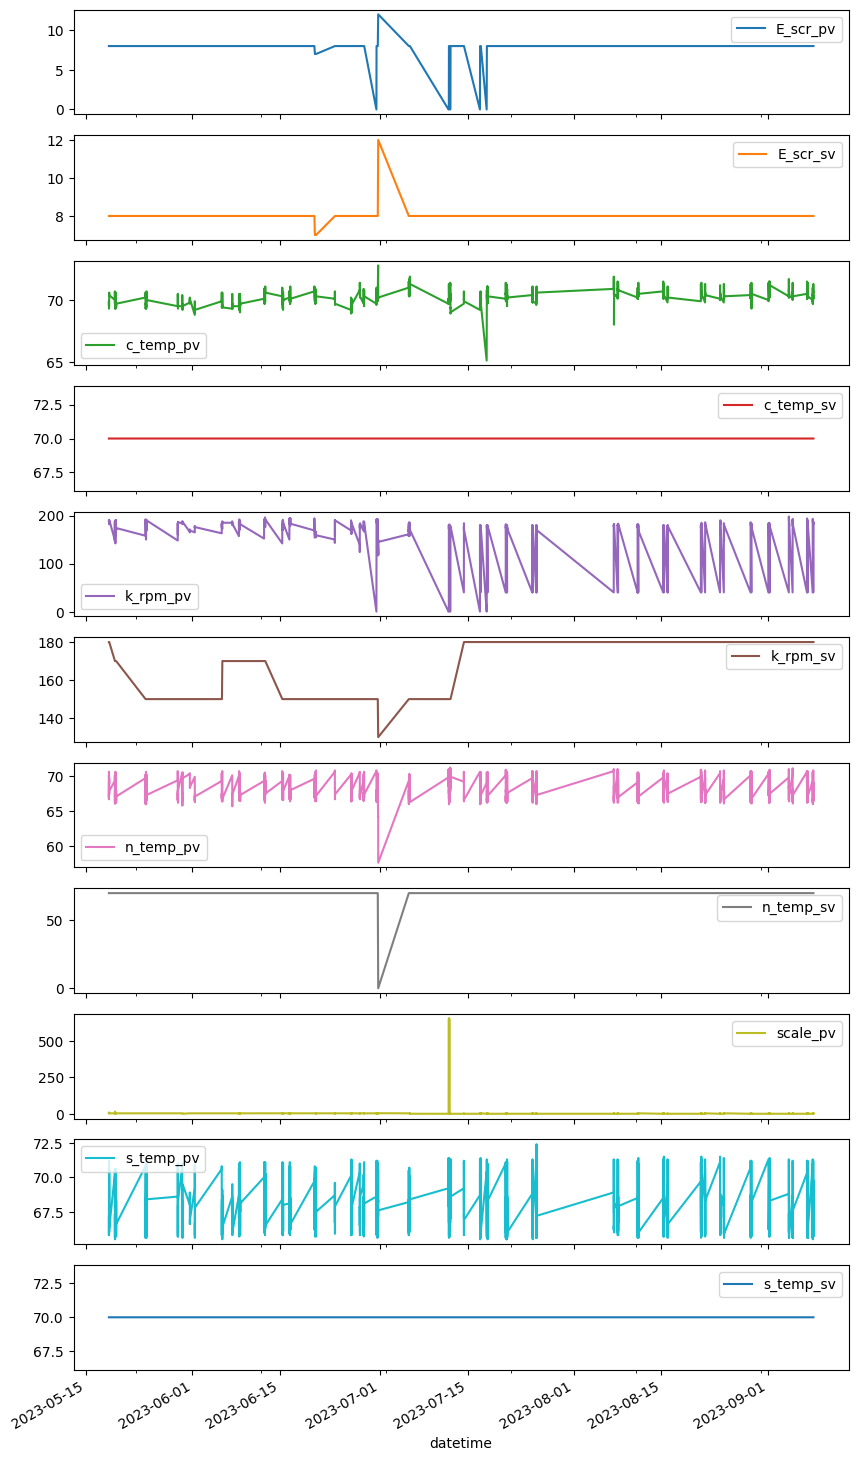

In [7]:
# 1-3. Visualize
import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(10, 20))
plt.show()

In [8]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143091 entries, 2023-05-18 15:09:19.018900+00:00 to 2023-09-08 07:31:10.649393+00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   E_scr_pv   143091 non-null  int64  
 1   E_scr_sv   143091 non-null  int64  
 2   c_temp_pv  143091 non-null  float64
 3   c_temp_sv  143091 non-null  int64  
 4   k_rpm_pv   143091 non-null  int64  
 5   k_rpm_sv   143091 non-null  int64  
 6   n_temp_pv  143091 non-null  float64
 7   n_temp_sv  143091 non-null  int64  
 8   scale_pv   143091 non-null  float64
 9   s_temp_pv  143091 non-null  float64
 10  s_temp_sv  143091 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 13.1 MB


(None,
             E_scr_pv       E_scr_sv      c_temp_pv  c_temp_sv       k_rpm_pv  \
 count  143091.000000  143091.000000  143091.000000   143091.0  143091.000000   
 mean        7.820715       7.997666      70.448102       70.0     174.427735   
 std         1.180048       0.095067       0.438494        0.0      27.542531   
 min         0.000000       7.000000      65.100000       70.0       0.000000   
 25%         8.000000       8.000000      70.200000       70.0     175.000000   
 50%         8.000000       8.000000      70.400000       70.0     178.000000   
 75%         8.000000       8.000000      70.700000       70.0     183.000000   
 max        12.000000      12.000000      72.800000       70.0     198.000000   
 
             k_rpm_sv      n_temp_pv      n_temp_sv       scale_pv  \
 count  143091.000000  143091.000000  143091.000000  143091.000000   
 mean      173.928619      67.972548      69.976518       8.424822   
 std        11.941990       1.189133       1.281862 

### 2. 1st Preprocessing : Check scale_pv data

In [9]:
# 2. 1st Preprocessing : Check scale_pv data
data['scale_pv'].describe()

count    143091.000000
mean          8.424822
std          71.109769
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         655.350000
Name: scale_pv, dtype: float64

In [10]:
# 2-1. boxplot, histogram
import matplotlib.pyplot as plt

def box_hist(data):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.boxplot(data, vert=False)
    plt.subplot(1, 3, 2)
    plt.hist(data, bins=20)
    plt.subplot(1, 3, 3)
    plt.plot(data)
    plt.show()

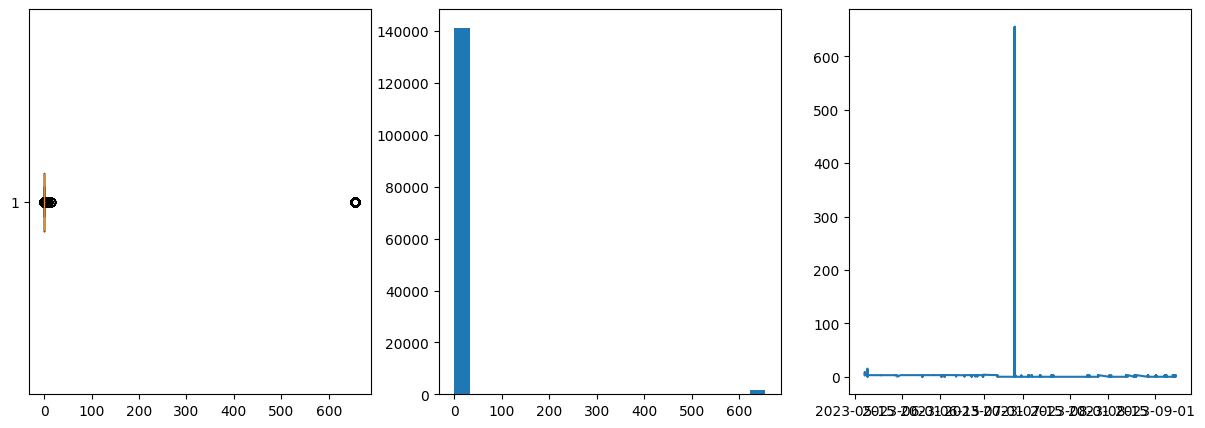

In [11]:
box_hist(data['scale_pv'])

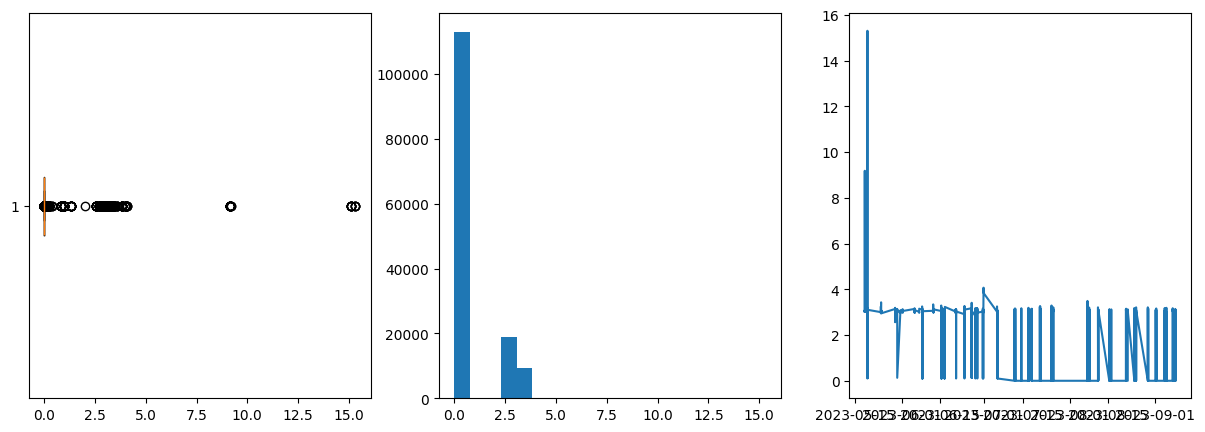

In [12]:
# 2-2. eliminate outliers : over 100
data_100 = data[data['scale_pv'] < 100]
box_hist(data_100['scale_pv'])

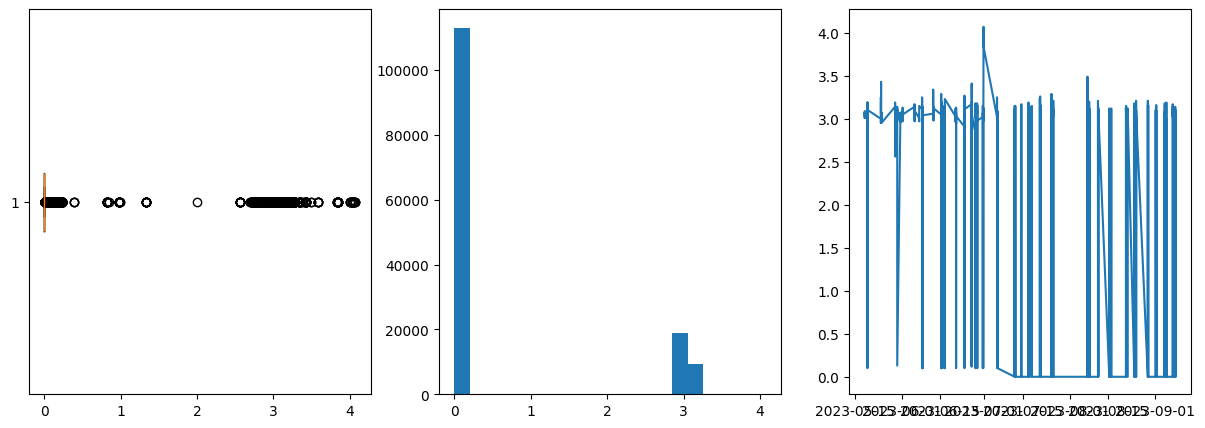

In [13]:
# 2-3. eliminate outliers : over 5
data_5 = data[data['scale_pv'] < 5]
box_hist(data_5['scale_pv'])

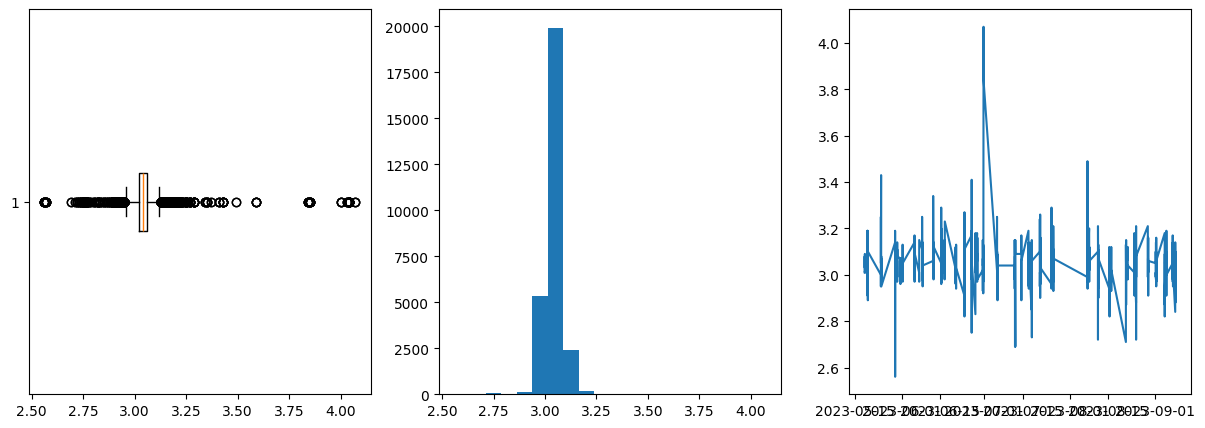

In [14]:
# 0에 가까운 값이 10만개 이상으로 많지만 모두 이상치로 판단
data_2_5 = data[(2 < data['scale_pv']) & (data['scale_pv'] < 5)]
box_hist(data_2_5['scale_pv'])

##### 실제 데이터는 2.5 이상 4 미만에 분포하지만 2 이상 5 미만으로 범위 설정

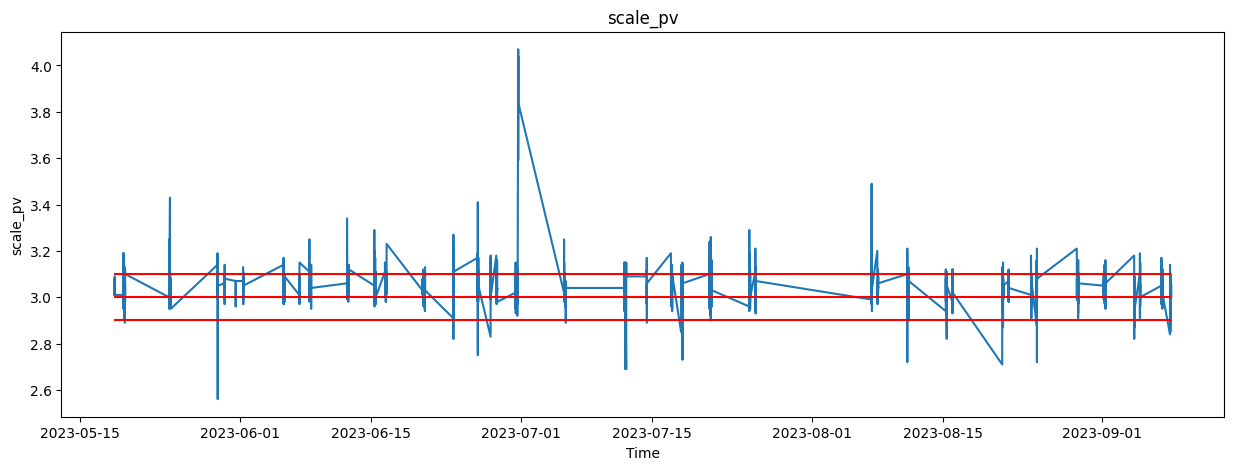

In [15]:
data = data_2_5

# Visualize : scale_pv
import numpy as np

plt.figure(figsize=(15, 5))
plt.plot(data['scale_pv'])
plt.xlabel('Time')
plt.ylabel('scale_pv')
plt.title('scale_pv')
plt.hlines(3.1, data.index[0], data.index[-1], 'r')
plt.hlines(3, data.index[0], data.index[-1], 'r')
plt.hlines(2.9, data.index[0], data.index[-1], 'r')
plt.show()

In [16]:
# 3.6 이상의 데이터가 거의 없음
print('전체 데이터 개수 :', len(data))
print('3.6 이상의 데이터 개수 :', len(data[data['scale_pv'] > 3.6]))

전체 데이터 개수 : 28167
3.6 이상의 데이터 개수 : 43


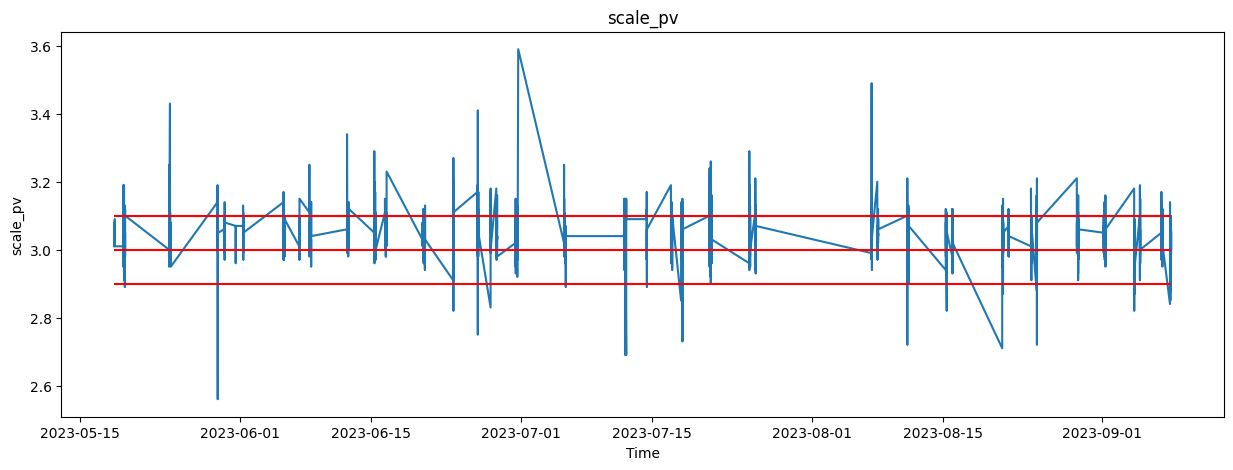

In [17]:
data = data[data['scale_pv'] < 3.6]

plt.figure(figsize=(15, 5))
plt.plot(data['scale_pv'])
plt.xlabel('Time')
plt.ylabel('scale_pv')
plt.title('scale_pv')
plt.hlines(3.1, data.index[0], data.index[-1], 'r')
plt.hlines(3, data.index[0], data.index[-1], 'r')
plt.hlines(2.9, data.index[0], data.index[-1], 'r')
plt.show()

### 3. 2nd Preprocessing : Create deviation & difference columns

In [18]:
# 3. 2nd Preprocessing : Create deviation & difference columns
# - deviation : E_scr_sv - E_scr_pv
# - difference : scale_pv[i] - scale_pv[i-1]
data.head(2)

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
datetime,,,,,,,,,,,
2023-05-18 15:09:19.018900+00:00,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
2023-05-18 15:09:20.128150+00:00,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70


In [19]:
# 3-1. deviation
data['scr_dv'] = data['E_scr_sv'] - data['E_scr_pv']
data['ctemp_dv'] = data['c_temp_sv'] - data['c_temp_pv']
data['rpm_dv'] = data['k_rpm_sv'] - data['k_rpm_pv']
data['ntemp_dv'] = data['n_temp_sv'] - data['n_temp_pv']
data['stemp_dv'] = data['s_temp_sv'] - data['s_temp_pv']
data.head(2)

C:\Users\wjs31\AppData\Local\Temp\ipykernel_4764\59246459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scr_dv'] = data['E_scr_sv'] - data['E_scr_pv']
C:\Users\wjs31\AppData\Local\Temp\ipykernel_4764\59246459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ctemp_dv'] = data['c_temp_sv'] - data['c_temp_pv']
C:\Users\wjs31\AppData\Local\Temp\ipykernel_4764\59246459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv
datetime,,,,,,,,,,,,,,,,
2023-05-18 15:09:19.018900+00:00,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70,0,0.4,-9,2.8,2.9
2023-05-18 15:09:20.128150+00:00,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70,0,0.2,-9,2.8,3.0


In [20]:
# 3-2. difference
data['scale_pv_diff'] = data['scale_pv'].diff()
data['scale_pv_diff'].iloc[0] = 0
data['scale_pv_diff'].describe()

C:\Users\wjs31\AppData\Local\Temp\ipykernel_4764\2879394564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scale_pv_diff'] = data['scale_pv'].diff()
C:\Users\wjs31\AppData\Local\Temp\ipykernel_4764\2879394564.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[

count    28124.000000
mean         0.000001
std          0.024863
min         -0.570000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.600000
Name: scale_pv_diff, dtype: float64

In [21]:
# 변화량 비교 : 1에 가까운 편차를 가진 부분이 있다
data.head(3)

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff
datetime,,,,,,,,,,,,,,,,,
2023-05-18 15:09:19.018900+00:00,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70,0,0.4,-9,2.8,2.9,0.00
2023-05-18 15:09:20.128150+00:00,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70,0,0.2,-9,2.8,3.0,0.00
2023-05-18 15:12:38.819460+00:00,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70,0,0.3,-9,2.1,4.1,0.07


In [22]:
data.describe()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff
count,28124.000000,28124.000000,28124.000000,28124.0,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.0,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000
mean,7.976675,7.982079,70.367586,70.0,179.863888,174.050277,67.609202,69.987555,3.042048,67.412278,70.0,0.005405,-0.367586,-5.813611,2.378353,2.587722,0.000001
std,0.253321,0.145451,0.469160,0.0,9.389085,11.346330,0.926099,0.933284,0.042386,1.126770,0.0,0.207869,0.469160,14.548773,1.232020,1.126770,0.024863
min,0.000000,7.000000,68.800000,70.0,0.000000,130.000000,59.100000,0.000000,2.560000,65.500000,70.0,0.000000,-1.900000,-45.000000,-59.200000,-1.500000,-0.570000
25%,8.000000,8.000000,70.100000,70.0,176.000000,180.000000,67.000000,70.000000,3.020000,66.400000,70.0,0.000000,-0.700000,-11.000000,2.100000,1.800000,0.000000
50%,8.000000,8.000000,70.400000,70.0,180.000000,180.000000,67.300000,70.000000,3.040000,67.300000,70.0,0.000000,-0.400000,-2.000000,2.700000,2.700000,0.000000
75%,8.000000,8.000000,70.700000,70.0,186.000000,180.000000,67.900000,70.000000,3.060000,68.200000,70.0,0.000000,-0.100000,4.000000,3.000000,3.600000,0.000000
max,12.000000,12.000000,71.900000,70.0,196.000000,180.000000,71.100000,70.000000,3.590000,71.500000,70.0,8.000000,1.200000,150.000000,4.300000,4.500000,0.600000


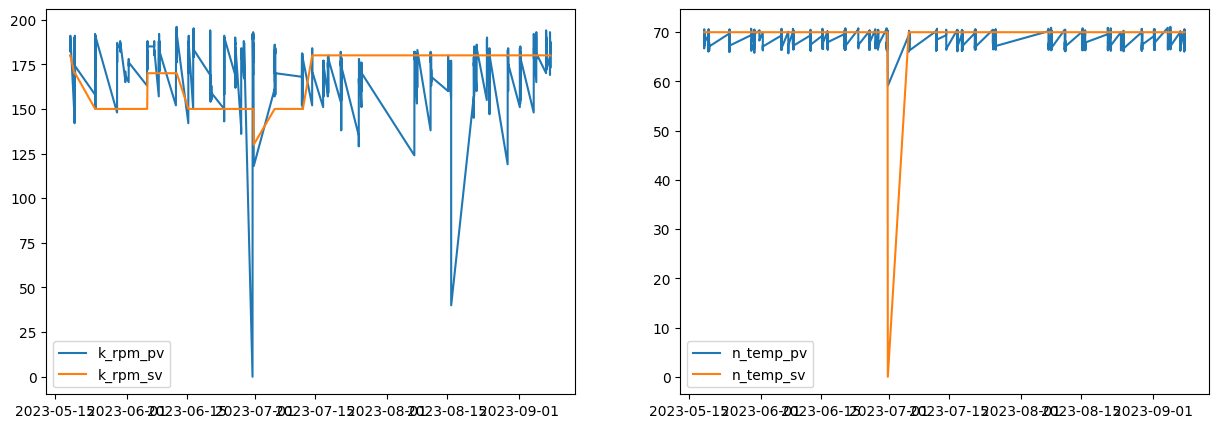

In [23]:
# rpm max 150 ??? 최소도 -45, -59??
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(data['k_rpm_pv'], label='k_rpm_pv')
plt.plot(data['k_rpm_sv'], label='k_rpm_sv')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(data['n_temp_pv'], label='n_temp_pv')
plt.plot(data['n_temp_sv'], label='n_temp_sv')
plt.legend()
plt.show()

In [24]:
data.scale_pv.count()

28124

In [25]:
sv = data.iloc[:, [1, 3, 5, 7, 10]]
for i in range(5):
    print(sv.iloc[:, i].value_counts())
    print()

E_scr_sv
8     27595
7       524
12        5
Name: count, dtype: int64

c_temp_sv
70    28124
Name: count, dtype: int64

k_rpm_sv
180    21187
150     4888
170     2044
130        5
Name: count, dtype: int64

n_temp_sv
70    28119
0         5
Name: count, dtype: int64

s_temp_sv
70    28124
Name: count, dtype: int64



In [26]:
# 무의미한 컬럼 제거 : c_temp_sv, s_temp_sv
data = data.drop(['c_temp_sv', 's_temp_sv'], axis=1)
data.head()

,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff
datetime,,,,,,,,,,,,,,,
2023-05-18 15:09:19.018900+00:00,8,8,69.6,189,180,67.2,70,3.01,67.1,0,0.4,-9,2.8,2.9,0.00
2023-05-18 15:09:20.128150+00:00,8,8,69.8,189,180,67.2,70,3.01,67.0,0,0.2,-9,2.8,3.0,0.00
2023-05-18 15:12:38.819460+00:00,8,8,69.7,189,180,67.9,70,3.08,65.9,0,0.3,-9,2.1,4.1,0.07
2023-05-18 15:12:39.958188+00:00,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00
2023-05-18 15:12:41.050178+00:00,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00


### 날짜 인덱스 제거

In [27]:
# 날짜 인덱스 수정 : datetime에서 weekday만 추출
data = data.reset_index()
data['datetime'] = pd.to_datetime(data['datetime'])
data['weekday'] = data['datetime'].dt.weekday
data.head()

,datetime,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
0,2023-05-18 15:09:19.018900+00:00,8,8,69.6,189,180,67.2,70,3.01,67.1,0,0.4,-9,2.8,2.9,0.00,3
1,2023-05-18 15:09:20.128150+00:00,8,8,69.8,189,180,67.2,70,3.01,67.0,0,0.2,-9,2.8,3.0,0.00,3
2,2023-05-18 15:12:38.819460+00:00,8,8,69.7,189,180,67.9,70,3.08,65.9,0,0.3,-9,2.1,4.1,0.07,3
3,2023-05-18 15:12:39.958188+00:00,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00,3
4,2023-05-18 15:12:41.050178+00:00,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00,3


In [28]:
data['weekday'].value_counts()

weekday
4    11183
1     5702
0     4562
3     3966
2     2625
6       86
Name: count, dtype: int64

In [29]:
data = data.drop('datetime', axis=1)
data.head()

,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
0,8,8,69.6,189,180,67.2,70,3.01,67.1,0,0.4,-9,2.8,2.9,0.00,3
1,8,8,69.8,189,180,67.2,70,3.01,67.0,0,0.2,-9,2.8,3.0,0.00,3
2,8,8,69.7,189,180,67.9,70,3.08,65.9,0,0.3,-9,2.1,4.1,0.07,3
3,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00,3
4,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00,3


### 무의미한 컬럼 제거

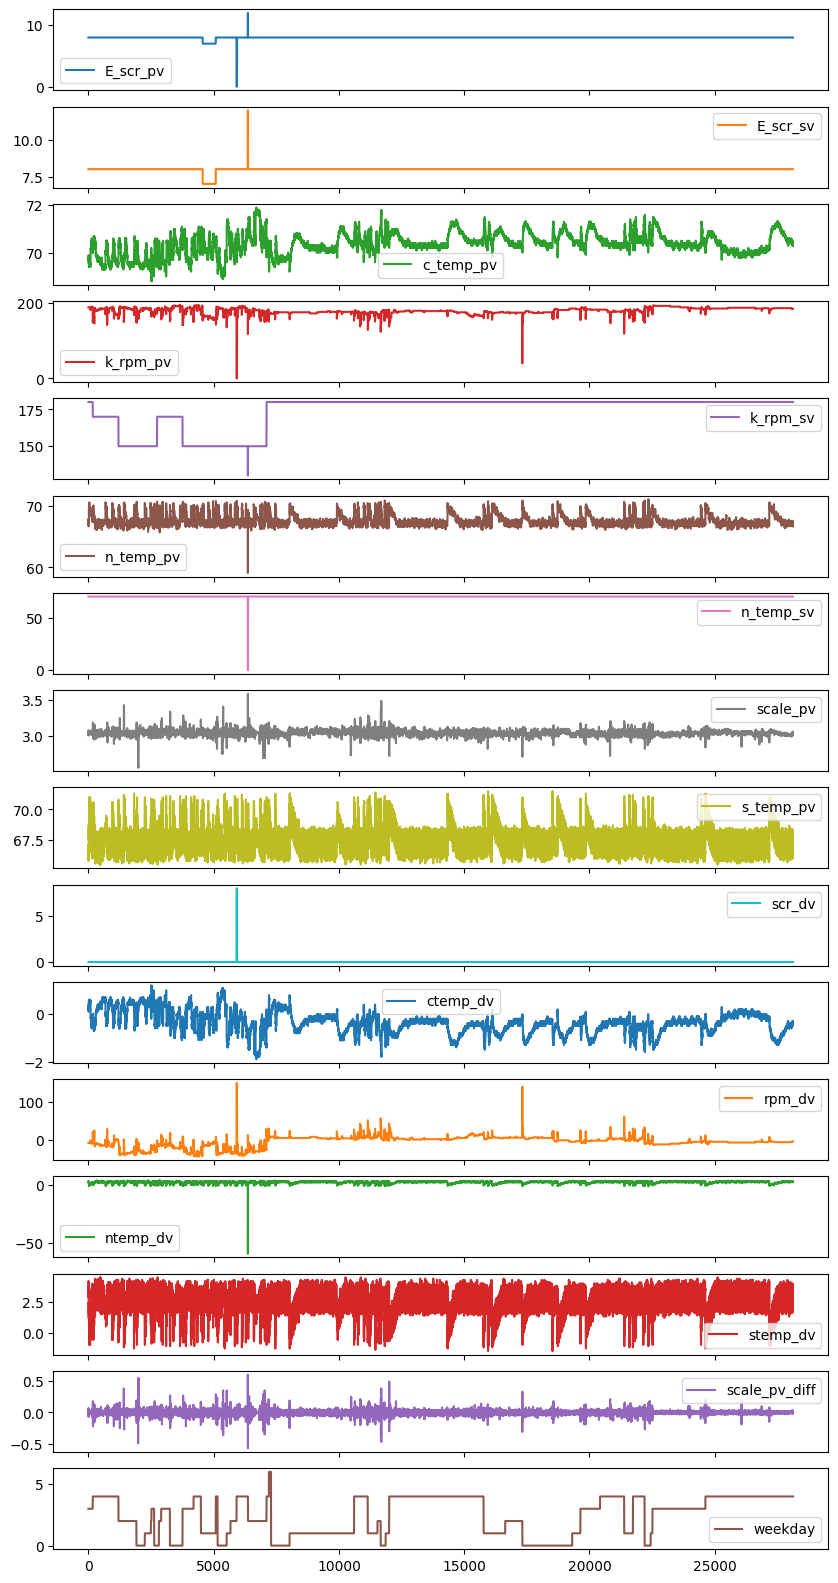

In [30]:
# 시각화
import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(10, 20))
plt.show()

In [31]:
# 같은 분류의 데이터끼리 모으기
# data = data.drop(['ctemp_dv', 'stemp_dv'], axis=1)    # 무의미함
data.columns
for i in enumerate(data.columns):
    print(i)


(0, 'E_scr_pv')
(1, 'E_scr_sv')
(2, 'c_temp_pv')
(3, 'k_rpm_pv')
(4, 'k_rpm_sv')
(5, 'n_temp_pv')
(6, 'n_temp_sv')
(7, 'scale_pv')
(8, 's_temp_pv')
(9, 'scr_dv')
(10, 'ctemp_dv')
(11, 'rpm_dv')
(12, 'ntemp_dv')
(13, 'stemp_dv')
(14, 'scale_pv_diff')
(15, 'weekday')


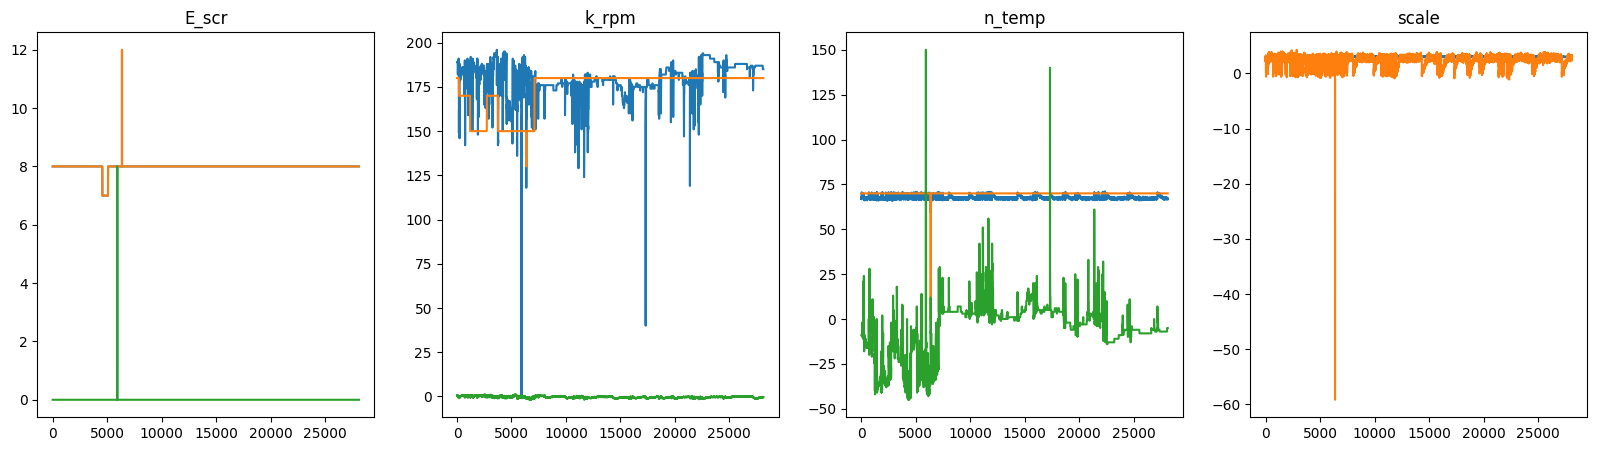

In [32]:

E_scr = data.iloc[:, [0, 1, 9]]
k_rpm = data.iloc[:, [3, 4, 10]]
n_temp = data.iloc[:, [5, 6, 11]]
scale = data.iloc[:, [7, 12]]

# visualize
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.plot(E_scr)
plt.title('E_scr')
plt.subplot(1, 4, 2)
plt.plot(k_rpm)
plt.title('k_rpm')
plt.subplot(1, 4, 3)
plt.plot(n_temp)
plt.title('n_temp')
plt.subplot(1, 4, 4)
plt.plot(scale)
plt.title('scale')
plt.show()


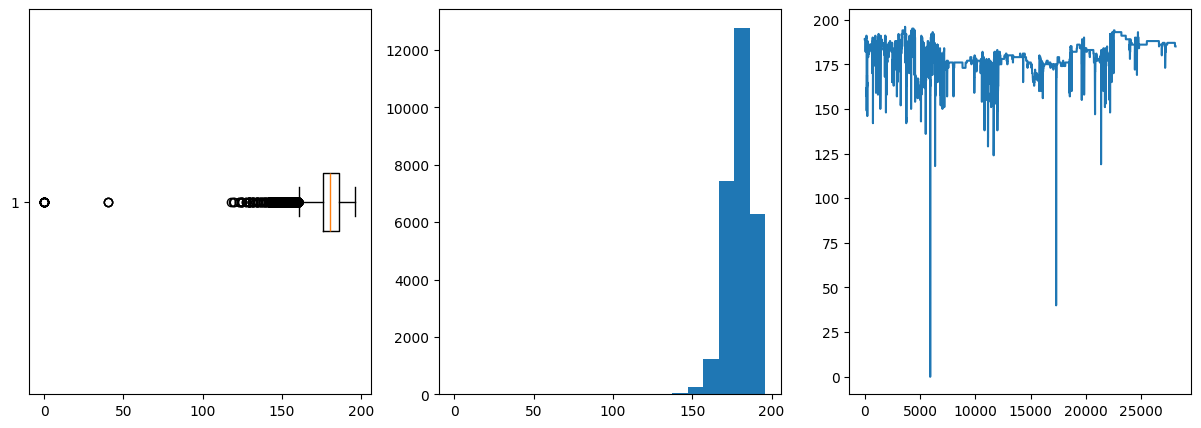

In [37]:
# rpm describe
data['k_rpm_pv'].describe()

box_hist(data['k_rpm_pv'])

In [ ]:
# 

In [33]:
# 1. E_scr의 dv가 0이 아닌 값
data[data['scr_dv'] != 0]       # pv가 0

,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
5910,0,8,69.7,0,150,70.7,70,3.02,68.6,8,0.3,150,-0.7,1.4,0.04,4
5911,0,8,69.6,0,150,70.7,70,3.02,68.6,8,0.4,150,-0.7,1.4,0.00,4
5912,0,8,69.8,0,150,70.8,70,3.02,68.8,8,0.2,150,-0.8,1.2,0.00,4
5913,0,8,69.8,0,150,70.8,70,3.02,68.8,8,0.2,150,-0.8,1.2,0.00,4
5914,0,8,69.7,0,150,70.7,70,3.02,68.8,8,0.3,150,-0.7,1.2,0.00,4
5915,0,8,69.7,0,150,70.8,70,3.01,68.9,8,0.3,150,-0.8,1.1,-0.01,4
5916,0,8,69.7,0,150,70.7,70,3.01,68.9,8,0.3,150,-0.7,1.1,0.00,4
5917,0,8,69.7,0,150,70.7,70,3.01,68.9,8,0.3,150,-0.7,1.1,0.00,4
5918,0,8,69.7,0,150,70.7,70,3.01,69.0,8,0.3,150,-0.7,1.0,0.00,4
5919,0,8,69.6,0,150,70.7,70,3.02,69.0,8,0.4,150,-0.7,1.0,0.01,4


In [34]:
# rpm_dv가 100이상인 값
data[data['rpm_dv'] > 100]      # pv가 0


,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
5910,0,8,69.7,0,150,70.7,70,3.02,68.6,8,0.3,150,-0.7,1.4,0.04,4
5911,0,8,69.6,0,150,70.7,70,3.02,68.6,8,0.4,150,-0.7,1.4,0.00,4
5912,0,8,69.8,0,150,70.8,70,3.02,68.8,8,0.2,150,-0.8,1.2,0.00,4
5913,0,8,69.8,0,150,70.8,70,3.02,68.8,8,0.2,150,-0.8,1.2,0.00,4
5914,0,8,69.7,0,150,70.7,70,3.02,68.8,8,0.3,150,-0.7,1.2,0.00,4
5915,0,8,69.7,0,150,70.8,70,3.01,68.9,8,0.3,150,-0.8,1.1,-0.01,4
5916,0,8,69.7,0,150,70.7,70,3.01,68.9,8,0.3,150,-0.7,1.1,0.00,4
5917,0,8,69.7,0,150,70.7,70,3.01,68.9,8,0.3,150,-0.7,1.1,0.00,4
5918,0,8,69.7,0,150,70.7,70,3.01,69.0,8,0.3,150,-0.7,1.0,0.00,4
5919,0,8,69.6,0,150,70.7,70,3.02,69.0,8,0.4,150,-0.7,1.0,0.01,4


In [35]:
import seaborn as sns

plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# 파일 저장
data.to_csv('../DATA/scale_2_to_4.csv', index=False)